## Observations and Insights 

In [1]:
# Some observations gathered from the data below as requested in the rubric:

# Mice treated with Ramicane and Capomulin had the fewest occurrences of metastatic sites and the lowest final tumor volume findings.
# Mice treated with Ketapril had the highest average final tumor volume findings
# There is a moderately positive correlation between tumor volume and weight


In [48]:
# Comment for the person assigned to grading this code:

# Near the end of the assignment I have to create a scatter plot:
# My findings are slightly different from the rubric example image.
# I would like to know if there was something off in my method,
# and how I might correct that error.  Thank you.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import random
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Set the seed so our data is reproducible
random.seed(42)

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
len(combined_df['Mouse ID'].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mousestudy_df = combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False, ignore_index=True)

clean_mousestudy_df = clean_mousestudy_df[clean_mousestudy_df['Mouse ID'] != 'g989']

In [8]:
# Checking the number of mice in the clean DataFrame.
len(clean_mousestudy_df['Mouse ID'].unique())

248

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

#another method
# drug_mean_df= study_complete[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").mean().rename(columns={"Tumor Volume (mm3)": "Tumor Volume (mm3) [mean]"})

tumor_mean = clean_mousestudy_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
tumor_median = clean_mousestudy_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
tumor_var = clean_mousestudy_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
tumor_std_dev = clean_mousestudy_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
tumor_sem = clean_mousestudy_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

#renaming my series...
mean_volume = tumor_mean.rename('Mean Tumor Volume')
median_volume = tumor_median.rename('Median Tumor Volume')
volume_var = tumor_var.rename('Tumor Volume Variance')
volume_stdev = tumor_std_dev.rename('Tumor Volume Std. Dev.')
volume_sterr = tumor_sem.rename('Tumor Volume Std. Err.')


In [25]:
# Assemble the resulting series into a single summary dataframe.

summary_statistics = [mean_volume,median_volume,volume_var,volume_stdev,volume_sterr]
summary_statistics_dict = {'Mean':[tumor_mean],
                        'Median' :[tumor_median],
                        'Variance' :[tumor_var],
                        'Standard Dev.' :[tumor_std_dev],
                        'SEM' :[tumor_sem],
                              }

summary_stats_df = pd.DataFrame(summary_statistics).transpose()
summary_stats_df.head(15)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_mousestudy_df.groupby(['Drug Regimen']).agg({
        'Tumor Volume (mm3)': ['mean', 'median', 'sum', 'std', 'var']})


Tumor Volume (mm3)                                              
                           mean     median           sum       std        var
Drug Regimen                                                                 
Capomulin             40.675741  41.557809   9355.420462  4.994774  24.947764
Ceftamin              52.591172  51.776157   9361.228582  6.268188  39.290177
Infubinol             52.884795  51.820584   9413.493529  6.567243  43.128684
Ketapril              55.235638  53.698743  10384.299876  8.279709  68.553577
Naftisol              54.331565  52.509285  10105.671026  8.134708  66.173479
Placebo               54.033581  52.288934   9780.078122  7.821003  61.168083
Propriva              52.320930  50.446266   7743.497619  6.622085  43.852013
Ramicane              40.216745  40.673236   9169.417875  4.846308  23.486704
Stelasyn              54.233149  52.431737   9816.199991  7.710419  59.450562
Zoniferol             53.236507  51.818479   9689.044192  6.966589  48.533355

## Bar and Pie Charts

In [27]:
clean_mousestudy_df['Drug Regimen'].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [28]:
len(clean_mousestudy_df['Mouse ID'].unique()) 

248

In [29]:
mice_drugs_series = clean_mousestudy_df.groupby(['Drug Regimen'])['Timepoint'].count()
mice_drugs_series.sort_values(ascending=False, inplace=True)

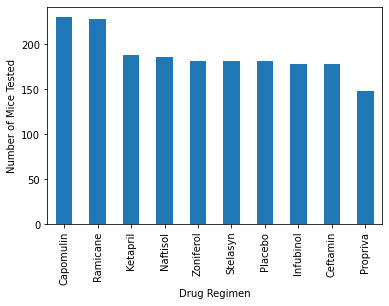

In [30]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas. 

mice_drugs_series.plot(kind='bar')
plt.ylabel("Number of Mice Tested")
plt.show()

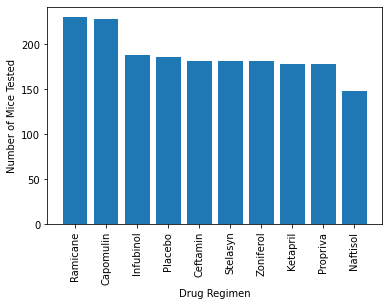

In [31]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#set x axis, y, and tick locations

#we want our x axis to be the controlled variable, the drug types as a list: 
#['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
#        'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']

drug_list = clean_mousestudy_df['Drug Regimen'].unique()
#our y axis is the number of times that drug was administered to distinct mice, for a total of 248 mice
drugs_administered = mice_drugs_series
tick_locations = [drug for drug in drug_list]


# x_axis = mouse and time points
# y_axis = drugs given...

#plot the chart

plt.bar(drug_list,mice_drugs_series)
plt.xticks(tick_locations, drug_list, rotation="vertical")
plt.ylabel("Number of Mice Tested")
plt.xlabel("Drug Regimen")
plt.show()


In [32]:
#for lack of a more advanced idea, I will use the below code to count occurences per gender in 'Sex'

total_male = clean_mousestudy_df[clean_mousestudy_df['Sex'] == "Male"]
total_female = clean_mousestudy_df[clean_mousestudy_df['Sex'] == "Female"]
sexes_count = [len(total_male),len(total_female)]
sexes_count

[958, 922]

In [33]:
sexes_dict = pd.DataFrame({'Sex': ['Male','Female'],
                          'Gender':sexes_count})


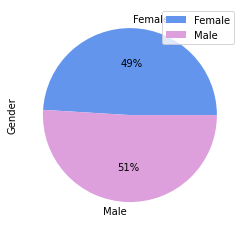

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
colors = ['cornflowerblue', 'plum']
sexes_dict.groupby(['Sex']).sum().plot(kind='pie', y='Gender',autopct='%1.0f%%',colors=colors)


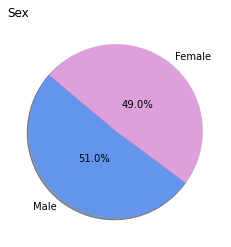

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
total_mf = sexes_count
colors = ['cornflowerblue', 'plum']

plt.pie(total_mf , labels=labels, colors=colors,
        autopct="%1.1f%%", pctdistance = .4, labeldistance=1.1, shadow=True, startangle=140)
plt.title('Sex',loc='left')
plt.show()

## Quartiles, Outliers and Boxplots

In [36]:
clean_mousestudy_df['Drug Regimen'].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [37]:
clean_mousestudy_df.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_vol = clean_mousestudy_df.drop_duplicates(subset=['Mouse ID'], keep='last', ignore_index=True)

#isolate Capomulin, Ramicane, Infubinol, and Ceftamin in a new dataframe
reduced_tumor_df = final_tumor_vol.loc[(final_tumor_vol['Drug Regimen'] == 'Capomulin')|
                                       (final_tumor_vol['Drug Regimen'] == 'Ramicane')|
                                       (final_tumor_vol['Drug Regimen'] == 'Infubinol')|
                                       (final_tumor_vol['Drug Regimen'] == 'Ceftamin')]
                                       

reduced_tumor_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [39]:
# Another method that achieves the same result as the cell above:

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_time_mouse = reduced_tumor_df.groupby(['Mouse ID']).max()['Timepoint']
max_time_mouse
max_time_df = pd.DataFrame(max_time_mouse)

drug_merge_df = pd.merge(max_time_df,reduced_tumor_df, how='inner',on=['Timepoint','Mouse ID'])
drug_merge_df


,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,a203,Infubinol,Female,20,23,67.973419,2
1,45,a251,Infubinol,Female,21,25,65.525743,1
2,45,a275,Ceftamin,Female,20,28,62.999356,3
3,45,a411,Ramicane,Male,3,22,38.407618,1
4,45,a444,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,45,y769,Ceftamin,Female,6,27,68.594745,4
96,45,y793,Capomulin,Male,17,17,31.896238,2
97,45,y865,Ceftamin,Male,23,26,64.729837,3
98,45,z578,Ramicane,Male,11,16,30.638696,0


In [40]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

In [41]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

In [42]:
#for loop to fill empty list:
 # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    tumor_vol = reduced_tumor_df.loc[reduced_tumor_df['Drug Regimen']==treatment,'Tumor Volume (mm3)']
    # add subset 
    tumor_vol_list.append(tumor_vol)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lower = quartiles[0.25]
    upper = quartiles[0.75]
    iqr = upper-lower

    lowerbound = lower - (1.5*iqr)
    upperbound = upper + (1.5*iqr)
        
    # Determine outliers using upper and lower bounds
    outliers = tumor_vol.loc[(tumor_vol<lowerbound) | (tumor_vol>upperbound)]
    
    print(f"{treatment} potential outliers: {outliers}")


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


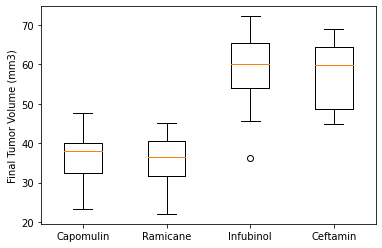

In [43]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
# ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumor_vol_list, labels=treatments)
plt.show()


## Line and Scatter Plots

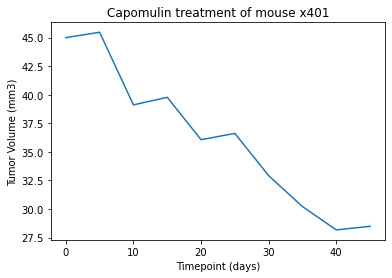

In [44]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
single_mouse = 'x401'
single_mouse_df = clean_mousestudy_df.loc[clean_mousestudy_df['Mouse ID'] == single_mouse]
# single_mouse_df
#plot (x,y)
plt.plot(single_mouse_df['Timepoint'],single_mouse_df['Tumor Volume (mm3)'])
plt.title(f'Capomulin treatment of mouse {single_mouse}')
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

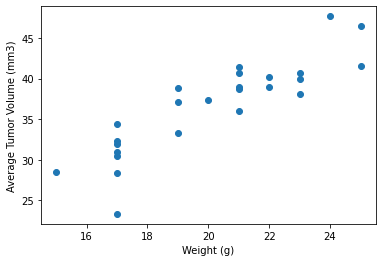

In [45]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = reduced_tumor_df.loc[(reduced_tumor_df['Drug Regimen'] == 'Capomulin'),:]

plt.scatter(capomulin_df['Weight (g)'],capomulin_df["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.88


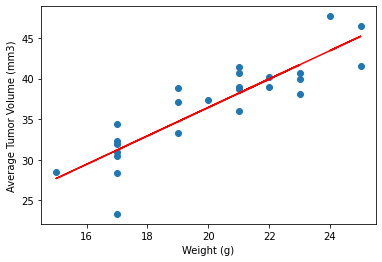

In [46]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = capomulin_df['Weight (g)']
y_values = capomulin_df['Tumor Volume (mm3)']
#this is a tuple that is unpacking thie linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#create the equation y=mx+b:
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#I do not know why my results are slightly different than the homework example.
#For instance, the correlation should be 0.84, not 0.88
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(y_values,x_values)[0],2)}")
plt.show()

